# Week 4 Quiz

## Weichen Li - wl2726

### Due Sunday Feb 23 9:00am

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

We're going to calculate the 95% confidence interval for the mean value of 'magnesium' from our wine dataset.

In [4]:
# Read in ../data/wine_dataset.csv as df
df = pd.read_csv('../data/wine_dataset.csv')

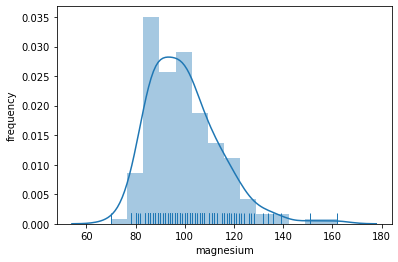

In [16]:
# Generate a distribution plot of the magnesium column.
mag = df.magnesium
ax=sns.distplot(mag, rug=True)
ax.set_xlabel('magnesium');
ax.set_ylabel('frequency');

In [4]:
# Assign the mean value of magnesium to variable observed_mean
observed_mean = mag.mean()
# Print the observed mean to the hundredths place
print(f'observed mean: {observed_mean:0.2f}')

observed mean: 99.74


In [5]:
# generate a bootstrap sample (with the same number of values as the original dataset)
#   using pandas sample (with replacement) 
#   using random_state=123
#   assign the result to sample
sample = mag.sample(len(mag),replace=True,random_state=123)
# Print the mean of the sample to the hundredths place
# Note: if the sample mean is the same as the observed mean, 
#       check, are you sampling with replacement?
sample123_mean = sample.mean()
print(f'sampled mean: {sample123_mean:0.2f}')

sampled mean: 98.69


In [6]:
# Generate 1000 additional sample means using bootstrap sampling
#   each sample should have the same length as the original dataframe
#   store in the list sample_means
#   do not use random_state for this step (your results may differ from the course solution slightly)
sample_means = []
for i in range(1000):
    sample_mean = mag.sample(len(mag),replace=True,random_state=i).mean()
    sample_means.append(sample_mean)
# Print the first 5 values in sample_means
sample_means[:5]

[100.62921348314607,
 100.42134831460675,
 101.20224719101124,
 100.83707865168539,
 100.40449438202248]

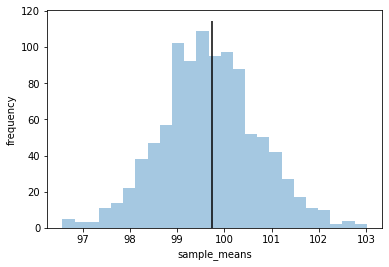

In [7]:
# Plot the distribution of sample means using sns.distplot
# Store the returned axis in ax.
ax = sns.distplot(sample_means, kde=False)
ax.set_xlabel('sample_means')
ax.set_ylabel('frequency')

# Add a vertical line located at the observed mean on the x-axis using ax.vlines()
#     Use ax.get_ylim() to provide the y limits
ax.vlines(observed_mean,*ax.get_ylim())

In [8]:
# To get the 95% confidence interval, we need want to retain the central 95% of our sample means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.
trim_amount = .5*(1-.95) * 1000

# We want to index into our sample means, but trim_amount is a float.
# We must be first round this value and converted to an integer.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np.round(trim_amount))

# Print trim_idx
trim_idx

25

In [9]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample means.
# Use np.sorted() to return a sorted numpy array 
#   then use a list of the indices we want [trim_idx,-trim_idx] to index into this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,-trim_idx]] 

# Print the ci values
ci

array([ 97.69101124, 101.81460674])

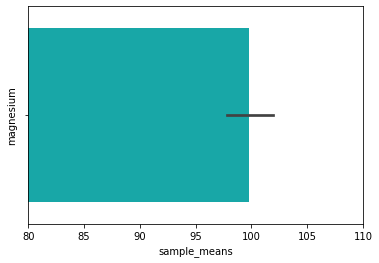

In [10]:
# We can confirm these values by using seaborns barplot function.
# Call seaborn barplot on the magnesium column from the original dataframe
#   and compare the 95% CI plotted there to the values we calculated
# Capture the returned axis in x
ax=sns.barplot(mag,
            estimator=np.mean, #default
            ci=95,             #default
            n_boot=1000,        #default
            orient='h',
            color='c',
           )
ax.set_xlabel('sample_means')
ax.set_ylabel('magnesium')
# Modify the xaxis to zoom in between 80 and 110 using ax.set_xlim(80,110)
ax.set_xlim(80,110)
ax